In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from libtiff import TIFF
from matplotlib import pyplot as plt

In [2]:
tif = TIFF.open('./KUB_124347.tiff')
image = tif.read_image()
#im = Image.open('./KUB_124347.tiff')
#im.show()

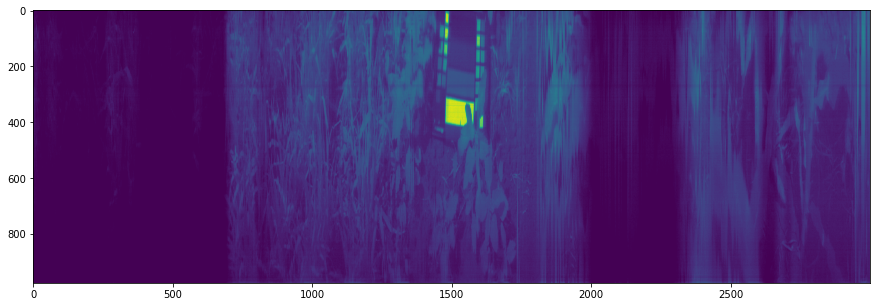

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(image[:,:,249])

In [4]:
def NDVI_each(HSI,nir,red):
    ndvi = np.zeros((np.shape(HSI)[0],np.shape(HSI)[1]))
    for i in range(np.shape(HSI)[0]):
        for j in range(np.shape(HSI)[1]):
            mean_nir = HSI[i,j, nir]
            mean_red = HSI[i, j, red]
            if(mean_nir + mean_red == 0.0):
                continue
            else:
                ndvi[i,j] = (mean_nir - mean_red) / (mean_nir + mean_red)
    return ndvi

In [20]:
def delta_ground_grass(ndvi):
    
    grass_1 = ndvi[:100,:1000]
    grass_2 = ndvi[450:700,1550:1650]
    grass_3 = ndvi[450:,2050:2300]
    
    ground_1 = ndvi[100:330,1450:1580]
    ground_2 = ndvi[400:600,2800:2900]
    
    mean_grass = np.mean(grass_1) + np.mean(grass_2) + np.mean(grass_3)
    mean_ground = np.mean(ground_1) + np.mean(ground_2)
    
    disp = (1/3) * ((np.mean(grass_1) - mean_grass)**2 + (np.mean(grass_2) - mean_grass)**2  + (np.mean(grass_3) - mean_grass)**2) 
    
    return disp, np.abs(mean_grass - mean_ground)

In [6]:
img = np.concatenate((image[:,:1000,:], image[:,1450:1650,:], image[:,2050:2300,:], image[:,2800:2900,:]), axis = 1)
print(np.shape(img))

(976, 1550, 250)


In [21]:
delta_list = []
disp_list = []
ch_list = []

for nir in tqdm(range(140,250,10)):
    for red in range(80,120,5):
        s = f'{nir}_{red}'
        ndvi = NDVI_each(image, nir=nir, red=red)
        k,d = delta_ground_grass(ndvi)
        disp_list.append(k)
        
        delta_list.append(d)
        ch_list.append(s)

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Firsov\AppData\Local\Temp/ipykernel_1804/2648195161.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  if(mean_nir + mean_red == 0.0):
C:\Users\Firsov\AppData\Local\Temp/ipykernel_1804/2648195161.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  ndvi[i,j] = (mean_nir - mean_red) / (mean_nir + mean_red)
100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [11:11<00:00, 61.00s/it]


In [8]:
delta_list

[0.794619361748536,
 2.5927665822193235,
 0.5123030197542322,
 1.399686409572988,
 2.457674804438649,
 4.534672832645812,
 2.7223461707705816,
 4.6787566750798995,
 2.8282735406642994,
 1.3533763605020246,
 2.7198930798112837,
 2.0317535533305033,
 0.3426026841660015,
 4.366799243881474,
 2.06824608466731,
 4.2310851070728885,
 4.3353625923164145,
 0.9209874678300007,
 4.56582177400038,
 4.506747394977187,
 3.7454719452706025,
 4.8208907506361784,
 5.0172109590457055,
 4.707106534813906,
 4.2191550832534555,
 3.534143639151281,
 4.6606599651171825,
 4.6393655299409104,
 4.621642284621109,
 4.806351600416415,
 5.012428889628973,
 4.664183723471471,
 4.128401464159952,
 4.016527510455765,
 4.652793691105293,
 4.725003992802872,
 4.736017279097999,
 4.835551932041434,
 5.306525114993552,
 5.0929949432048165,
 3.7446800369875697,
 4.1010980865115245,
 4.310180888738444,
 4.428726024642872,
 4.439002725760288,
 3.85472393616699,
 4.475176499860367,
 4.162428494057084,
 2.478338652462529,
 3

In [9]:
delta_list.index(np.max(delta_list))

167

In [22]:
disp_list.index(np.max(disp_list))

87

In [23]:
disp_list.index(np.min(disp_list))

24

In [27]:
ch_list[87]

'240_115'

In [11]:
def NDVI(HSI):
    ndvi = np.zeros((np.shape(HSI)[0],np.shape(HSI)[1]))
    for i in range(np.shape(HSI)[0]):
        for j in range(np.shape(HSI)[1]):
            mean_nir = np.mean(HSI[i, j, 140:250])
            mean_red = np.mean(HSI[i, j, 80:120])
            if(mean_nir + mean_red == 0):
                continue
            else:
                ndvi[i,j] = (mean_nir - mean_red) / (mean_nir + mean_red) * 255
            if(ndvi[i,j] < 50):
                ndvi[i,j] = 0
    return ndvi


In [12]:
ndvi = NDVI(image)

In [28]:
ndvi_1 = NDVI_each(image, 240, 115)

C:\Users\Firsov\AppData\Local\Temp/ipykernel_1804/2648195161.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  ndvi[i,j] = (mean_nir - mean_red) / (mean_nir + mean_red)
C:\Users\Firsov\AppData\Local\Temp/ipykernel_1804/2648195161.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  if(mean_nir + mean_red == 0.0):


In [14]:
np.max(ndvi_1)

255.0

In [15]:
l,ndvi_f = cv2.threshold(ndvi, 50, 255, cv2.THRESH_BINARY)

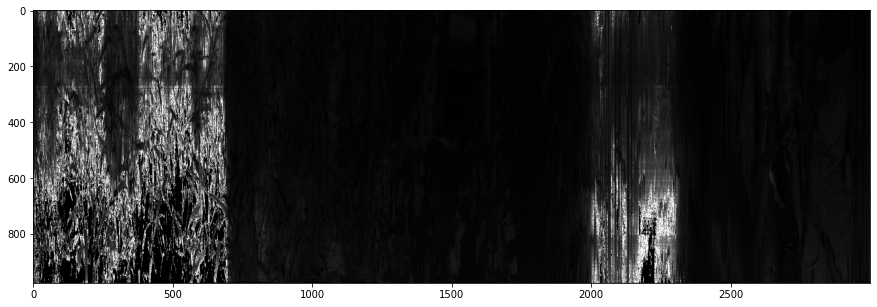

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(ndvi_1, cmap = 'gray')

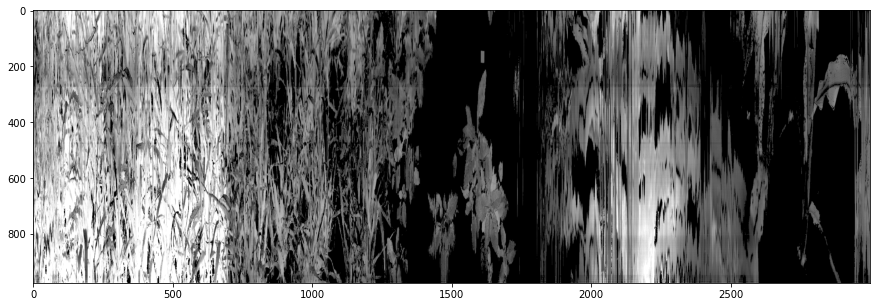

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(ndvi, cmap = 'gray')

In [64]:
mask = cv2.imread('KUB_124347_NDVI.bmp', 0)

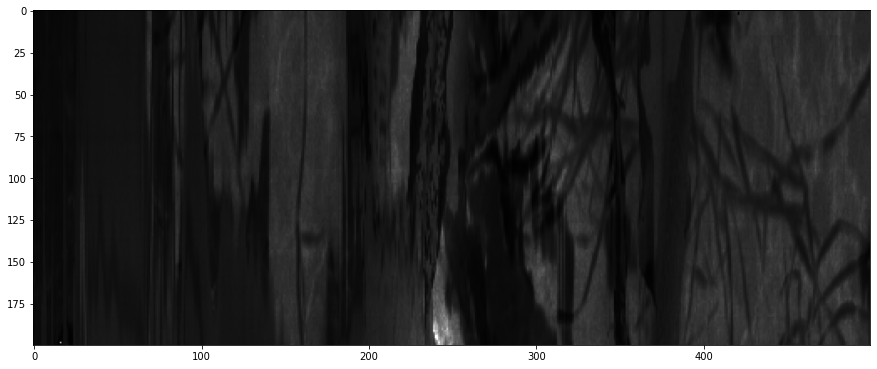

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(ndvi[400:600,2400:2900],cmap='gray')